In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt

# До деления

Считываем данные:

In [2]:
df = pd.read_csv('water.csv')
display(df)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


Строим точечный график:

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

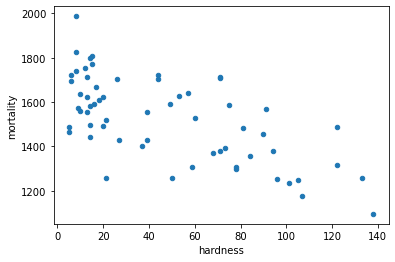

In [3]:
df.plot(x='hardness', y='mortality', kind='scatter')

Определяем матрицы коэффициентов корреляции Пирсона и Спирмена:

In [4]:
display(df[['hardness', 'mortality']].corr())
display(df[['hardness', 'mortality']].corr('spearman'))

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Строим модель линейной регрессии:

In [5]:
x = df[['hardness']]
y = df['mortality']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [7]:
model = LinearRegression()
print(model.fit(x_train, y_train))
print(model.coef_[0])
print(model.intercept_)

LinearRegression()
-2.9038855107457344
1655.471468818186


In [8]:
y_pred = model.predict(x_test)

Определяем коэффициент детерминации:

In [9]:
model.score(x_test, y_test)

0.5553187403881239

Выводим график остатков. Для удобства используем библиотеку statsmodels:

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [11]:
x_const = sm.add_constant(x_train)

In [12]:
model = sm.OLS(y_train, x_const)
results = model.fit()

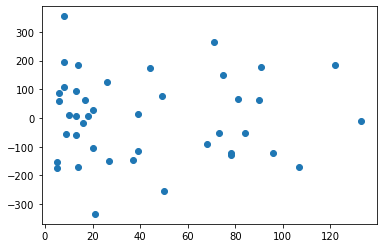

In [13]:
plt.scatter(x_const.iloc[:, 1], results.resid)

# Вывод
Разберём все полученные величины.
Коэффициенты Пирсона и Спирмена достаточно однозначно дают понять, что зависимость между величинами обратная и слегка выше среднего по уровню корреляции.

Построили модель линейной регрессии. Оценим её качество. Видим, что качество модели среднее (коэф. детерминации равен 0.55), то есть требуется подбор дополнительных критериев или установление других зависимостей для усоверешнствования модели. Помимо этого по графику остатков видим, что величины на графике не имеют систематичности и очевидной взаимосвязи между собой.

# После деления

In [14]:
df_south = df[df.location == 'South']
df_north = df[df.location == 'North']
# display(df_south)
# display(df_north)

### Южные города

Строим точечный график:

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

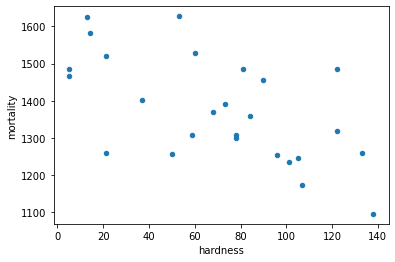

In [15]:
df_south.plot(x='hardness', y='mortality', kind='scatter')

Определяем матрицы коэффициентов корреляции Пирсона и Спирмена:

In [16]:
display(df_south[['hardness', 'mortality']].corr())
display(df_south[['hardness', 'mortality']].corr('spearman'))

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


Строим модель линейной регрессии:

In [17]:
x_s = df_south[['hardness']]
y_s = df_south['mortality']

In [18]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_s, y_s, test_size=0.30, random_state=100)

In [19]:
model_s = LinearRegression()
print(model_s.fit(x_train_s, y_train_s))
print(model_s.coef_[0])
print(model_s.intercept_)

LinearRegression()
-1.987682642761346
1505.8192042540177


In [20]:
y_pred_s = model_s.predict(x_test_s)

In [21]:
model_s.score(x_test_s, y_test_s)

-0.048586543435918506

Строим график остатков:

In [22]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_s, y_s, test_size=0.30, random_state=100)

In [23]:
x_const_s = sm.add_constant(x_train_s)

In [24]:
model_s = sm.OLS(y_train_s, x_const_s)
results_s = model_s.fit()

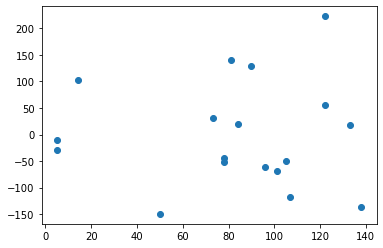

In [25]:
plt.scatter(x_const_s.iloc[:, 1], results_s.resid)

## Вывод
Несмотря на то, что график остатков показывает хаотичный характер формирования остатков, прогноз очень плох из-за низкого коэффициента детерминации. Вероятно следует обратиться к дополнительным признакам, потому что смертность в данном случае никак практически не связана с жёсткостью воды.

## Северные города

Строем точечный график:

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

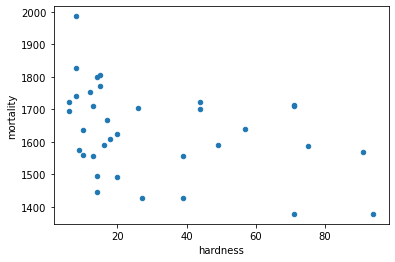

In [26]:
df_north.plot(x='hardness', y='mortality', kind='scatter')

Определяем матрицы коэффициентов корреляции Пирсона и Спирмена:

In [27]:
display(df_north[['hardness', 'mortality']].corr())
display(df_north[['hardness', 'mortality']].corr('spearman'))

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


Строим модель линейной регрессии:

In [28]:
x_n = df_north[['hardness']]
y_n = df_north['mortality']

In [29]:
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, test_size=0.30, random_state=100)

In [30]:
model_n = LinearRegression()
print(model_n.fit(x_train_n, y_train_n))
print(model_n.coef_[0])
print(model_n.intercept_)

LinearRegression()
-1.4132723078541367
1665.2687069920814


In [31]:
y_pred_n = model_n.predict(x_test_n)

In [32]:
model_n.score(x_test_n, y_test_n)

0.11467575564168586

Строим график остатков:

In [33]:
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, test_size=0.30, random_state=100)

In [34]:
x_const_n = sm.add_constant(x_train_n)

In [35]:
model_n = sm.OLS(y_train_n, x_const_n)
results_n = model_n.fit()

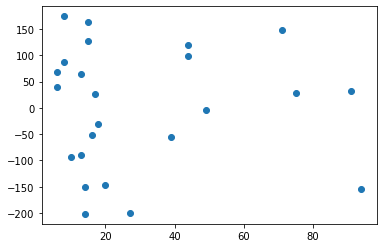

In [36]:
plt.scatter(x_const_n.iloc[:, 1], results_n.resid)

## Вывод
Идентичен выводу для южных городов, хотя взаимосвязь всё же немного сильнее.

# Итог

В целом мы достаточно уверенно может сказать, что зависимость смертности с жёсткостью воды крайне слабая. Вероятно требуется подобрать другие признаки для установления зависимости.